In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

(350, 350, 3)


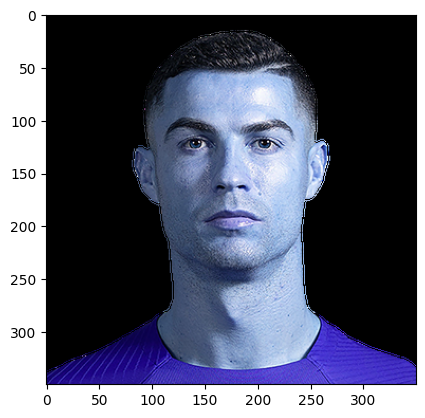

In [21]:
image = cv2.imread('Dataset/CristianoRonaldo/885.vresize.350.350.medium.14.png')
print(image.shape)
plt.imshow(image)

(350, 350)


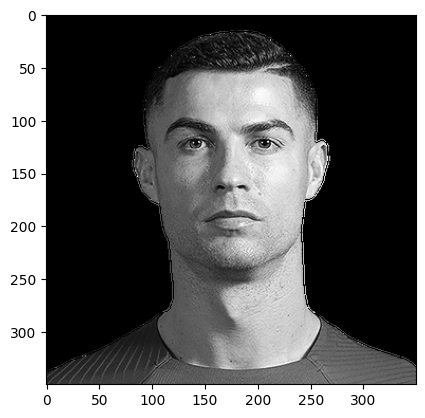

In [6]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascade_frontalface_default.xml')
left_eye_cascade = cv2.CascadeClassifier('opencv/haarcascade_lefteye_2splits.xml')
right_eye_cascade = cv2.CascadeClassifier('opencv/haarcascade_righteye_2splits.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
left_eye = left_eye_cascade.detectMultiScale(gray,1.3,5)
right_eye = right_eye_cascade.detectMultiScale(gray,1.3,5)

print("Face" , faces)
print("Left_Eye" , left_eye)
print("Right_Eye" , right_eye)

Face [[ 87  52 177 177]]
Left_Eye [[188  95  42  42]]
Right_Eye [[119  95  42  42]]


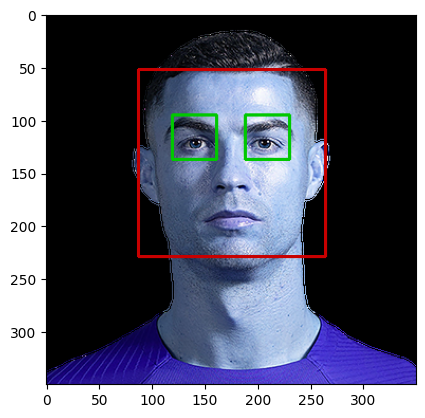

In [8]:
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(200,0,0),2)
(lex,ley,lew,leh) = left_eye[0]
left_eye_img = cv2.rectangle(image,(lex,ley),(lex+lew,ley+leh),(0,200,0),2)
(rex,rey,rew,reh) = right_eye[0]
right_eye_img = cv2.rectangle(image,(rex,rey),(rex+rew,rey+reh),(0,200,0),2)
plt.imshow(face_img,cmap='gray')

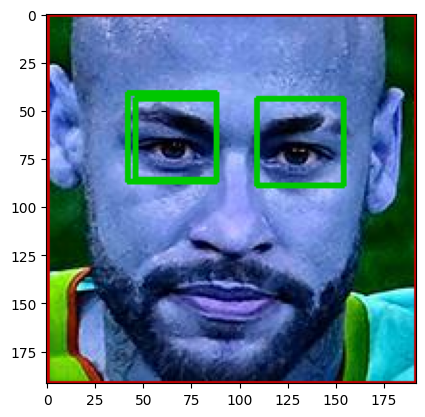

In [9]:
def Detect(path):
    image = cv2.imread(path)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    face_cascade = cv2.CascadeClassifier('opencv/haarcascade_frontalface_default.xml')
    left_eye_cascade = cv2.CascadeClassifier('opencv/haarcascade_lefteye_2splits.xml')
    right_eye_cascade = cv2.CascadeClassifier('opencv/haarcascade_righteye_2splits.xml')

    faces = face_cascade.detectMultiScale(gray,1.3,5)
    left_eye = left_eye_cascade.detectMultiScale(gray,1.3,5)
    right_eye = right_eye_cascade.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(200,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        for (lex,ley,lew,leh) in left_eye:
            face_img = cv2.rectangle(face_img,(lex,ley),(lex+lew,ley+leh),(0,200,0),2)
            for (rex,rey,rew,reh) in right_eye:
                face_img = cv2.rectangle(face_img,(rex,rey),(rex+rew,rey+reh),(0,200,0),2)
        roi_color = face_img[y:y+h, x:x+w]
    plt.imshow(roi_color,cmap='gray')
Detect('./Dataset/Neymar/01a51bd4-5b1e-45f3-bcbf-3d4bcc209e48_alta-libre-aspect-ratio_default_0.jpg')

In [10]:
def get_cropped_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
        eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

In [11]:
data_path = "./Dataset/"
cropped_data_path = "./Cropped_Data/"

In [12]:
import os
img_dirs = []
for entry in os.scandir(data_path):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./Dataset/CristianoRonaldo',
 './Dataset/LionelMessi',
 './Dataset/Neymar',
 './Dataset/sunilchhetri']

In [13]:
cropped_image_dirs = [] # List of cropped image dir for each player
names_dict = {}
for img_dir in img_dirs:
    count = 1
    name = img_dir.split('/')[-1]
    print(name)
    names_dict[name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            crop = cropped_data_path + name
            if not os.path.exists(crop):
                os.makedirs(crop)
                print("Generating in " , crop)
            cropped_image_dirs.append(crop)
            cropped_file_name = name + str(count) + ".png"
            cropped_file_path = crop + "/" + cropped_file_name 
            cv2.imwrite(cropped_file_path, roi_color)
            names_dict[name].append(cropped_file_path)
            count += 1

CristianoRonaldo
Generating in  ./Cropped_Data/CristianoRonaldo
LionelMessi
Generating in  ./Cropped_Data/LionelMessi
Neymar
Generating in  ./Cropped_Data/Neymar
sunilchhetri
Generating in  ./Cropped_Data/sunilchhetri


In [14]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'CristianoRonaldo': ['./Cropped_Data/CristianoRonaldo\\CristianoRonaldo1.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo10.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo100.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo101.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo102.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo103.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo104.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo105.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo106.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo107.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo108.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo109.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo11.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo110.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo111.png',
  './Cropped_Data/CristianoRonaldo\\CristianoRonaldo11

In [15]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'CristianoRonaldo': 0, 'LionelMessi': 1, 'Neymar': 2, 'sunilchhetri': 3}

In [16]:
import numpy as np
import pywt
import cv2    

def w2d(image, mode='haar', level=1):
    imArray = image

    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [17]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        image = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(image, (32, 32))
        img_har = w2d(image,'db1',5)
        
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [18]:
X = np.array(X).reshape(len(X),4096).astype(float)


In [19]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7762237762237763